In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

In [25]:
# Load data
df = pd.read_csv('/content/sample_data/dataset_edit.csv')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id_umkm                 13467 non-null  object
 1   nama_usaha              13564 non-null  object
 2   jenis_usaha             13467 non-null  object
 3   tenaga_kerja_perempuan  13444 non-null  object
 4   tenaga_kerja_laki_laki  13462 non-null  object
 5   aset                    13453 non-null  object
 6   omset                   13451 non-null  object
 7   marketplace             13447 non-null  object
 8   kapasitas_produksi      13442 non-null  object
 9   status_legalitas        13470 non-null  object
 10  tahun_berdiri           13469 non-null  object
 11  laba                    13452 non-null  object
 12  biaya_karyawan          13469 non-null  object
 13  jumlah_pelanggan        13453 non-null  object
dtypes: object(14)
memory usage: 1.4+ MB


karena type data dari semua variabel object maka harus diubah ke integer untuk variabel numerik

In [27]:
# Define numeric and categorical columns
kolom_numerik = ['tenaga_kerja_perempuan', 'tenaga_kerja_laki_laki', 'aset', 'omset',
                 'kapasitas_produksi', 'laba', 'biaya_karyawan', 'jumlah_pelanggan', 'tahun_berdiri']
kolom_kategorik = ['nama_usaha', 'jenis_usaha', 'marketplace', 'status_legalitas']

In [28]:
for col in kolom_numerik:
    if col in df.columns: # Memastikan kolom ada di DataFrame sebelum konversi
        df[col] = pd.to_numeric(df[col], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_umkm                 13467 non-null  object 
 1   nama_usaha              13564 non-null  object 
 2   jenis_usaha             13467 non-null  object 
 3   tenaga_kerja_perempuan  13408 non-null  float64
 4   tenaga_kerja_laki_laki  13429 non-null  float64
 5   aset                    13422 non-null  float64
 6   omset                   13423 non-null  float64
 7   marketplace             13447 non-null  object 
 8   kapasitas_produksi      13400 non-null  float64
 9   status_legalitas        13470 non-null  object 
 10  tahun_berdiri           13436 non-null  float64
 11  laba                    13407 non-null  float64
 12  biaya_karyawan          13430 non-null  float64
 13  jumlah_pelanggan        13412 non-null  float64
dtypes: float64(9), object(5)
memory usage:

cek missing value

In [29]:
df.isnull().sum()

,0
id_umkm,97
nama_usaha,0
jenis_usaha,97
tenaga_kerja_perempuan,156
tenaga_kerja_laki_laki,135
aset,142
omset,141
marketplace,117
kapasitas_produksi,164
status_legalitas,94


In [30]:
# prompt: tampilkan unique value dari setiap kolom

# Menampilkan nilai unik dari setiap kolom
for col in df.columns:
  print(f"Unique values for column '{col}':")
  print(df[col].unique())
  print("-" * 30)

Unique values for column 'id_umkm':
['28828567' '28828568' '28828569' ... '288222128' '288222129' '288222130']
------------------------------
Unique values for column 'nama_usaha':
['UD. Alif Pamungkas' 'UD. Zidanar Panji' 'UD. Winda Jayengprana' ...
 'UD. Bayu Alam' 'UD. Olla Sudharmo Udin' 'UD. Qasya Kencana']
------------------------------
Unique values for column 'jenis_usaha':
['Kesehatan' 'Perdagangan' 'unknown' 'Jasa' 'Pendidikan' nan 'Fashion'
 'Makanan & Minuman' 'Perusahaan']
------------------------------
Unique values for column 'tenaga_kerja_perempuan':
[ 1.  5. 74. 89. 91. 76. 37. 75. 82. 17. 18. 27. 11. 95. 51. 86. 99. 57.
 93. 21. 44. 61. 41. 66.  8. 63. 14. 29. 25. 68. 94. 53. 78. 52. 98. 33.
 81. 13. 87. 12. 55. 71. 65. 62. 90. 28. 22. 35. 84.  6. 31. 15.  9. 58.
 79.  0. 69. 96.  4. 80. 24. 34. 38. 45. 36. 59. 30. 32. 83. 85. 60. 70.
 77. 19. 56. 88. 48. 97. 67. 64. 39. 23.  2. 16. 43.  3. 46. nan 92. 47.
 20. 26. 40. 50. 49. 54. 73. 42. 10.  7. 72.]
----------------

In [31]:
# Replace 'Unknown', 'unknown', '-' with NaN in categorical columns
for col in kolom_kategorik:
    if col in df.columns:
        df[col] = df[col].replace(['Unknown', 'unknown', '-'], np.nan)

In [32]:

# Hitung persentase missing value
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nPersentase Missing Values:")
missing_percentage


Persentase Missing Values:


,0
id_umkm,0.715128
nama_usaha,0.000000
jenis_usaha,0.965792
tenaga_kerja_perempuan,1.150103
tenaga_kerja_laki_laki,0.995282
aset,1.046889
omset,1.039516
marketplace,1.127986
kapasitas_produksi,1.209083
status_legalitas,0.958419


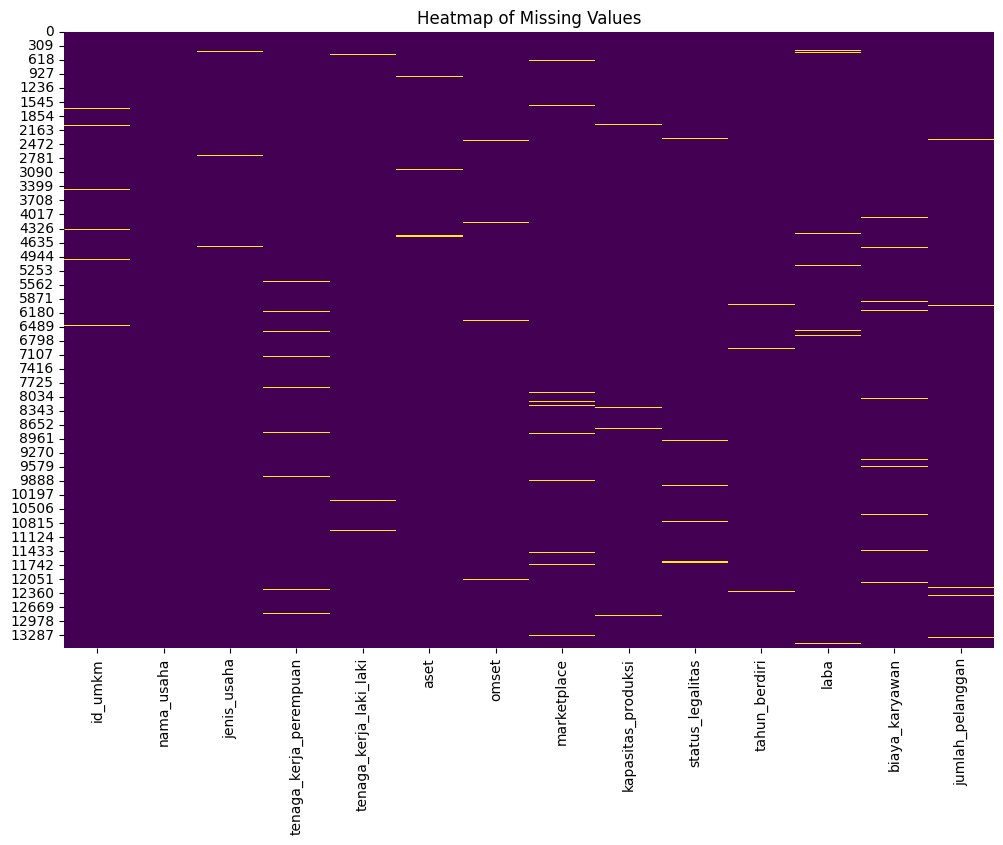

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()


In [34]:
# Imputasi missing values
df_imputed = df.copy()

In [35]:
# imputasi id
if 'id_umkm' in df_imputed.columns:
    df_imputed['id_umkm'] = pd.to_numeric(df_imputed['id_umkm'], errors='coerce')
    df_imputed['id_umkm'] = df_imputed['id_umkm'].fillna(df_imputed['id_umkm'].rolling(window=3, min_periods=1, center=True).median())
    median_id = df_imputed['id_umkm'].median()
    df_imputed['id_umkm'] = df_imputed['id_umkm'].fillna(median_id)
    df_imputed['id_umkm'] = df_imputed['id_umkm'].astype('object')
# Cek kembali missing value dan tipe data setelah imputasi
print("\nMissing values after imputing 'id_umkm':")
print(df_imputed.isnull().sum())
print("\nInfo after converting 'id_umkm' to object:")
df_imputed.info()


Missing values after imputing 'id_umkm':
id_umkm                     0
nama_usaha                  0
jenis_usaha               131
tenaga_kerja_perempuan    156
tenaga_kerja_laki_laki    135
aset                      142
omset                     141
marketplace               153
kapasitas_produksi        164
status_legalitas          130
tahun_berdiri             128
laba                      157
biaya_karyawan            134
jumlah_pelanggan          152
dtype: int64

Info after converting 'id_umkm' to object:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_umkm                 13564 non-null  object 
 1   nama_usaha              13564 non-null  object 
 2   jenis_usaha             13433 non-null  object 
 3   tenaga_kerja_perempuan  13408 non-null  float64
 4   tenaga_kerja_laki_laki  13429 non-null  float64
 

In [36]:
# 1. Imputasi omset, aset, laba menggunakan rumus: laba = omset - aset
while True:
    missing_before = df_imputed[['omset', 'aset', 'laba']].isnull().sum().sum()

    df_imputed.loc[df_imputed['omset'].isnull() & df_imputed['laba'].notnull() & df_imputed['aset'].notnull(), 'omset'] = \
        df_imputed['laba'] + df_imputed['aset']
    df_imputed.loc[df_imputed['aset'].isnull() & df_imputed['omset'].notnull() & df_imputed['laba'].notnull(), 'aset'] = \
        df_imputed['omset'] - df_imputed['laba']
    df_imputed.loc[df_imputed['laba'].isnull() & df_imputed['omset'].notnull() & df_imputed['aset'].notnull(), 'laba'] = \
        df_imputed['omset'] - df_imputed['aset']

    missing_after = df_imputed[['omset', 'aset', 'laba']].isnull().sum().sum()
    if missing_after == missing_before:
        break

In [37]:
# 2. Imputasi tenaga_kerja_perempuan dan tenaga_kerja_laki_laki dengan 0
for col in ['tenaga_kerja_perempuan', 'tenaga_kerja_laki_laki']:
    if col in df_imputed.columns:
        df_imputed[col] = df_imputed[col].fillna(0)

In [38]:
# 3. Imputasi biaya_karyawan dengan median
if 'biaya_karyawan' in df_imputed.columns:
    df_imputed['biaya_karyawan'] = df_imputed['biaya_karyawan'].fillna(df_imputed['biaya_karyawan'].median())

In [39]:

# 4. Imputasi kapasitas_produksi dengan jumlah_pelanggan dan sebaliknya
if 'kapasitas_produksi' in df_imputed.columns and 'jumlah_pelanggan' in df_imputed.columns:
    df_imputed.loc[df_imputed['kapasitas_produksi'].isnull(), 'kapasitas_produksi'] = df_imputed['jumlah_pelanggan']
    df_imputed.loc[df_imputed['jumlah_pelanggan'].isnull(), 'jumlah_pelanggan'] = df_imputed['kapasitas_produksi']



In [40]:
# 5. Imputasi jenis_usaha dan marketplace berdasarkan pengelompokan omset
if 'omset' in df_imputed.columns and df_imputed['omset'].notnull().sum() > 0:
    df_imputed['omset_group'] = pd.qcut(df_imputed['omset'], q=5, labels=False, duplicates='drop')
    for group in df_imputed['omset_group'].unique():
        if pd.notnull(group):
            group_mask = df_imputed['omset_group'] == group
            for col in ['jenis_usaha', 'marketplace']:
                if col in df_imputed.columns and df_imputed.loc[group_mask, col].isnull().sum() > 0:
                    mode_value = df_imputed.loc[group_mask, col].mode()
                    if not mode_value.empty:
                        df_imputed.loc[group_mask, col] = df_imputed.loc[group_mask, col].fillna(mode_value[0])
    df_imputed = df_imputed.drop(columns=['omset_group'])

In [41]:
# 6. Imputasi sisa jenis_usaha dan marketplace dengan modus keseluruhan
for col in ['jenis_usaha', 'marketplace']:
    if col in df_imputed.columns and df_imputed[col].isnull().sum() > 0:
        mode_value = df_imputed[col].mode()
        df_imputed[col] = df_imputed[col].fillna(mode_value[0] if not mode_value.empty else 'Tidak Diketahui')

In [42]:
# 7. Imputasi tahun_berdiri dan status_legalitas dengan modus
for col in ['tahun_berdiri', 'status_legalitas']:
    if col in df_imputed.columns and df_imputed[col].isnull().sum() > 0:
        mode_value = df_imputed[col].mode()
        if not mode_value.empty:
            df_imputed[col] = df_imputed[col].fillna(int(mode_value[0]) if col == 'tahun_berdiri' else mode_value[0])
        else:
            df_imputed[col] = df_imputed[col].fillna(0 if col == 'tahun_berdiri' else 'Unknown Status')

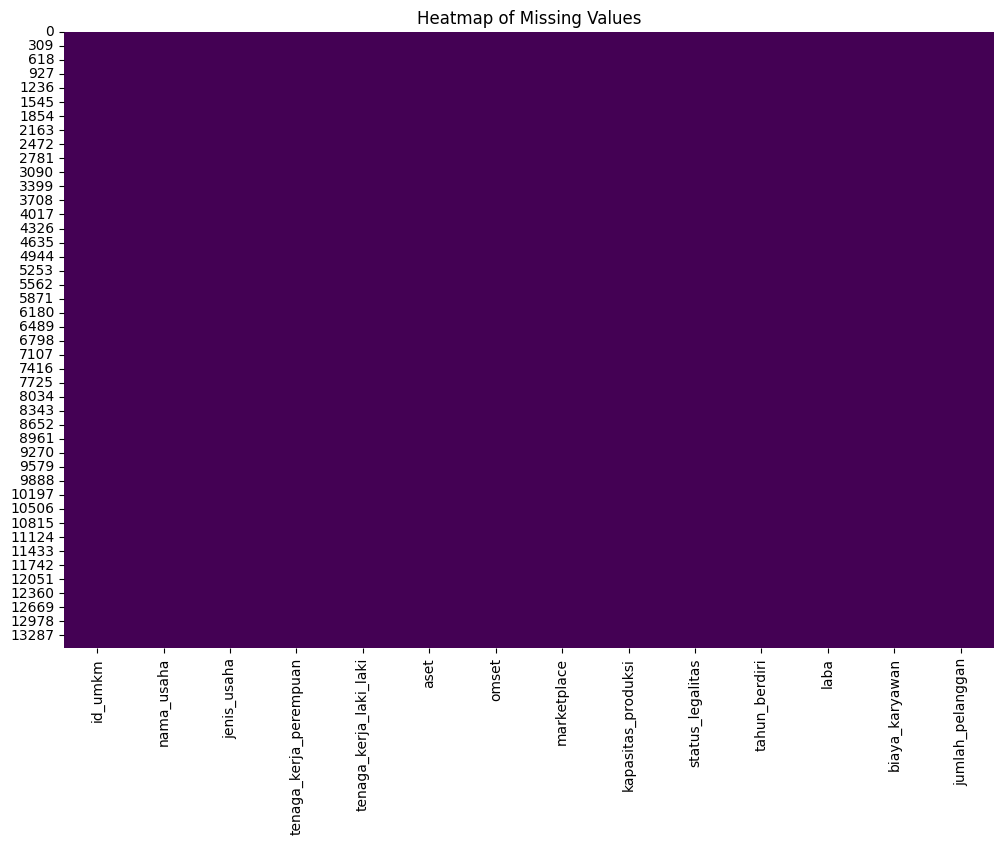

In [43]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_imputed.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()


In [44]:
# Save the cleaned DataFrame to a CSV file
df_imputed.to_csv('data_bersih.csv', index=False)

print("\nData bersih telah disimpan ke dalam file 'data_bersih.csv'")



Data bersih telah disimpan ke dalam file 'data_bersih.csv'
